In [1]:
import sys
from pathlib import Path

def get_project_root():
    for path in (Path.cwd(), *Path.cwd().parents):
        if (path / 'src').exists():
            return path
    raise ModuleNotFoundError("Could not find 'src' directory from current working directory.")

project_root = get_project_root()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.plot_data_utils import PlotDataUtils


In this notebook we present our data-analysis pipeline. We define several functions to load, plot and ultimately understand the data, which can later be used to formulate a solution to the challenge problem. First, we start by loading the data and initialize our data utils.

In [2]:
# Initialise utilities for the input CSV data
data_utils = PlotDataUtils(Path('../data/input_data.csv'))

# Then load the data
df = data_utils.load_data()

# We can also compute some statistics about the weather data. This augments the data object
# This function add means and quantiles to the wind data
df = data_utils.compute_wind_stats(df)

Our first step is to compute some summary statistics to understand what's going on.

In [3]:
summary = data_utils.wind_energy_summary(df)
corr = data_utils.price_wind_correlation(df)

print('Expected wind energy (MWh):', round(summary['expected_MWh'].iloc[0], 2))
print('Price stats (EUR/MWh):', summary[['price_min','price_mean','price_max']].iloc[0].round(2).to_dict())
print('Correlation mean wind vs price:', round(corr, 3))

Expected wind energy (MWh): 205.51
Price stats (EUR/MWh): {'price_min': 13.72, 'price_mean': 82.78, 'price_max': 151.42}
Correlation mean wind vs price: 0.467


We can also plot both the prices and the wind scenarios, including our data statistics.

c:\Users\50360247E\Desktop\Projects Thesis\IQM_Hackathon\src\plot_data_utils.py:207: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()


<Axes: title={'center': 'Wind production fan chart'}, xlabel='Hour of day', ylabel='Wind production (MWh)'>

c:\Users\50360247E\miniconda3\envs\iqm-py310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\50360247E\miniconda3\envs\iqm-py310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


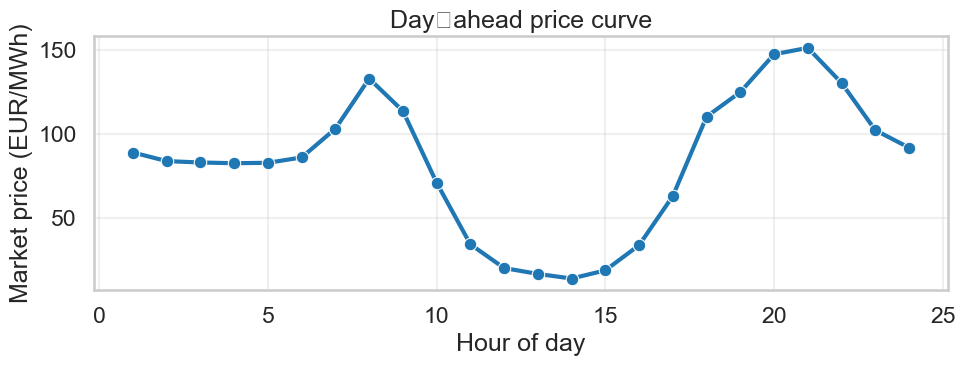

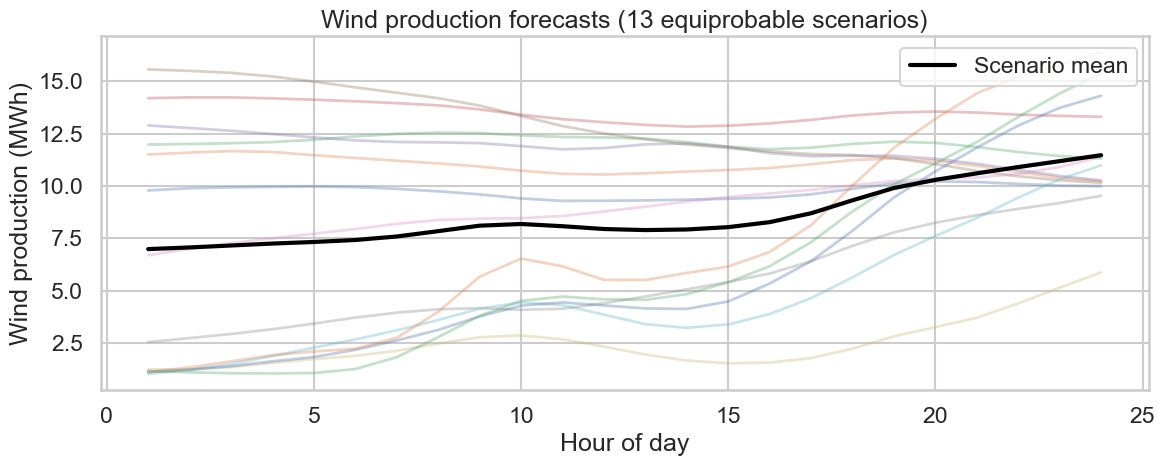

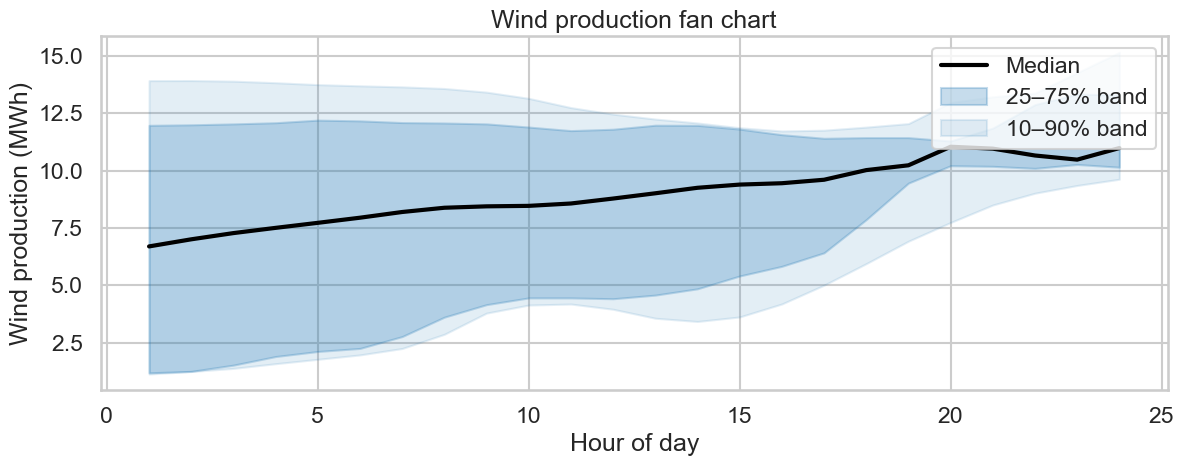

In [4]:
# Plot price curve
data_utils.plot_price_curve(df)

# Plot wind scenarios and quantiles
data_utils.plot_wind_scenarios(df)
quant_df = data_utils.compute_wind_quantiles(df)
data_utils.plot_wind_fan_chart(df, quant_df=quant_df)

We can also connect this with the price:

Corr(price, mean revenue): 0.953
Corr(price, revenue) across scenarios: mean=0.879, min=0.690, max=0.999


(<Axes: title={'center': 'Hourly revenue quantiles vs price'}, xlabel='Hour of day', ylabel='Revenue (EUR)'>,
 <Axes: ylabel='Market price (EUR/MWh)'>)

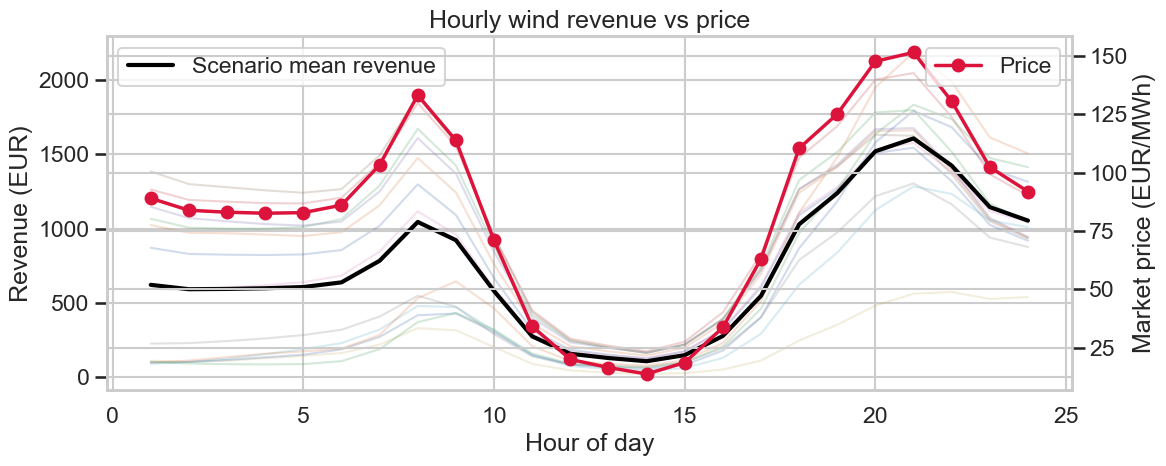

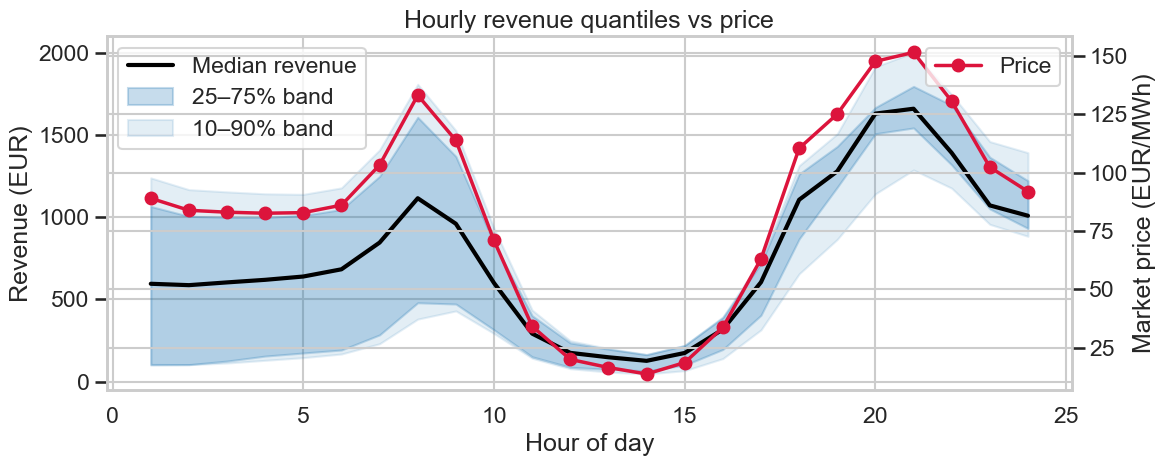

In [ ]:
# Revenue analysis
rev_df, rev_mean, rev_quant_df = data_utils.compute_revenue_stats(df)
corr_mean, corr_by_scenario = data_utils.price_revenue_correlations(df, rev_df, rev_mean)
print(f"Corr(price, mean revenue): {corr_mean:.3f}")
print(f"Corr(price, revenue) across scenarios: mean={corr_by_scenario.mean():.3f}, min={corr_by_scenario.min():.3f}, max={corr_by_scenario.max():.3f}")

# Overlay plots for revenue and price
data_utils.plot_revenue_overlay(df, rev_df, rev_mean)
data_utils.plot_revenue_fan_chart(df, rev_quant_df)

As we can see, the revenue is mostly affected by the price itself, because the mean value of the wind energy production does not change significantly with time. This means that doing an analysis that only includes the price of the energy is a valid first approximation to the problem.